## Initial try at exploring sample

#### To Do:

1. eliminate reduncant rat1, rat2, etc columns
2. see number of null values
3. describe values at high level


In [1]:
import numpy as np
import pandas as pd
import re

from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
filepath = "indeed_scrapy/scrape_data/"
filename = "company_reviews100to500fort20171020num_n_cowide sorted.csv"
df = pd.read_csv(filepath + filename, encoding = "latin1")

C:\Users\dsp21\Anaconda2\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (17,57,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
from IPython.display import display

#trying again: https://stackoverflow.com/questions/11361985/output-data-from-all-columns-in-a-dataframe-in-pandas
pd.options.display.max_rows = 50
pd.options.display.max_columns = 60
df.head()


,Unnamed: 0,agg_rating,bar_name1,bar_name2,bar_name3,bar_name4,bar_name5,bar_pct1,bar_pct2,bar_pct3,bar_pct4,bar_pct5,ceo_approval_pct,ceo_approval_ratings,comp_ben_rating,company_count_QnA,company_count_jobs,company_count_photos,company_count_reviews,company_count_salaries,company_empl,company_facebook,company_hq,company_indeed_url,company_industry,company_name,company_overall_rating,company_rev,company_twitter,company_website,...,rating_name1,rating_name2,rating_name3,rating_name4,rating_name5,rating_scr1,rating_scr2,rating_scr3,rating_scr4,rating_scr5,review_date,review_title,reviewer_company_empl_status,reviewer_job_location,reviewer_job_title,top_list,work_life_rating,review_id,Quick-paced,Slow-paced,Stressful,Balanced,Competitive,Relaxed,Cut-throat,Compensation/Benefits,Culture,Job Security/Advancement,Work/Life Balance,Management
0,0,5.0,Stressful,Quick-paced,Competitive,Cut-throat,Balanced,58%,44%,36%,27%,20%,77%,289 ratings,5.0,33,7K,625,822,7K,"10,000+",NaN,370 Wabasha St. N.,https://www.indeed.com/cmp/Ecolab,Industrial Manufacturing,Ecolab,3.5,more than $10B (USD),NaN,http://www.ecolab.com,...,Compensation/Benefits,Culture,Work/Life Balance,Job Security/Advancement,Management,3.5,3.2,3.1,3.1,3.0,"April 18, 2012",Many Opportunities in a Fast Growing Company,(Current Employee) ,"Victor, NY",Plant Process Information Manager,Fortune 500 2017-03-31,5.0,127000,44%,NaN,58%,20%,36%,NaN,27%,3.5,3.2,3.1,3.1,3.0
1,1,4.0,Stressful,Quick-paced,Competitive,Cut-throat,Balanced,58%,44%,36%,27%,20%,77%,289 ratings,4.0,33,7K,625,822,7K,"10,000+",NaN,370 Wabasha St. N.,https://www.indeed.com/cmp/Ecolab,Industrial Manufacturing,Ecolab,3.5,more than $10B (USD),NaN,http://www.ecolab.com,...,Compensation/Benefits,Culture,Work/Life Balance,Job Security/Advancement,Management,3.5,3.2,3.1,3.1,3.0,"April 15, 2012","good team mates,and friends",(Former Employee) ,"tri-state area,Nevada,California,Arizona",senior service speicalest,Fortune 500 2017-03-31,3.0,127001,44%,NaN,58%,20%,36%,NaN,27%,3.5,3.2,3.1,3.1,3.0
2,2,5.0,Stressful,Quick-paced,Competitive,Cut-throat,Balanced,58%,44%,36%,27%,20%,77%,289 ratings,NaN,33,7K,625,822,7K,"10,000+",NaN,370 Wabasha St. N.,https://www.indeed.com/cmp/Ecolab,Industrial Manufacturing,Ecolab,3.5,more than $10B (USD),NaN,http://www.ecolab.com,...,Compensation/Benefits,Culture,Work/Life Balance,Job Security/Advancement,Management,3.5,3.2,3.1,3.1,3.0,"April 13, 2012",Challenging and educational workplace,(Current Employee) ,"Saint Paul, MN",Route Sales Manager,Fortune 500 2017-03-31,NaN,127002,44%,NaN,58%,20%,36%,NaN,27%,3.5,3.2,3.1,3.1,3.0
3,3,5.0,Stressful,Quick-paced,Competitive,Cut-throat,Balanced,58%,44%,36%,27%,20%,77%,289 ratings,5.0,33,7K,625,822,7K,"10,000+",NaN,370 Wabasha St. N.,https://www.indeed.com/cmp/Ecolab,Industrial Manufacturing,Ecolab,3.5,more than $10B (USD),NaN,http://www.ecolab.com,...,Compensation/Benefits,Culture,Work/Life Balance,Job Security/Advancement,Management,3.5,3.2,3.1,3.1,3.0,"April 7, 2012",Ideal professional career position and company...,(Former Employee) ,"Eagan, MN",Collections Specialist/ Call Center,Fortune 500 2017-03-31,5.0,127003,44%,NaN,58%,20%,36%,NaN,27%,3.5,3.2,3.1,3.1,3.0
4,4,3.0,Stressful,Quick-paced,Competitive,Cut-throat,Balanced,58%,44%,36%,27%,20%,77%,289 ratings,3.0,33,7K,625,822,7K,"10,000+",NaN,370 Wabasha St. N.,https://www.indeed.com/cmp/Ecolab,Industrial Manufacturing,Ecolab,3.5,more than $10B (USD),NaN,http://www.ecolab.com,...,Compensation/Benefits,Culture,Work/Life Balance,Job Security/Advancement,Management,3.5,3.2,3.1,3.1,3.0,"April 3, 2012",Good company,(Former Employee) ,"Orlando, FL",Senior Service Specialist,Fortune 500 2017-03-31,1.0,127004,44%,NaN,58%,20%,36%,NaN,27%,3.5,3.2,3.1,3.1,3.0


In [15]:
flt1 = lambda x: '%.1f' % x
df.describe().applymap(flt1)

,Unnamed: 0,agg_rating,comp_ben_rating,company_count_QnA,company_count_reviews,company_facebook,company_overall_rating,company_twitter,culture_rating,helpful_downvote_count,helpful_upvote_count,jobsec_advancement_rating,management_rating,rating_scr1,rating_scr2,rating_scr3,rating_scr4,rating_scr5,work_life_rating,review_id,Compensation/Benefits,Culture,Job Security/Advancement,Work/Life Balance,Management
count,507557.0,507557.0,454424.0,507557.0,507557.0,0.0,507557.0,0.0,453613.0,193735.0,305281.0,453793.0,454028.0,507557.0,507557.0,507557.0,507557.0,507557.0,455586.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0
mean,253778.0,3.8,3.6,75.1,8011.9,nan,3.8,nan,3.6,2.7,5.0,3.3,3.4,3.8,3.7,3.6,3.4,3.3,3.6,380778.0,3.6,3.6,3.3,3.6,3.4
std,146519.2,1.1,1.3,83.7,15160.9,nan,0.2,nan,1.3,4.0,8.2,1.3,1.3,0.3,0.2,0.2,0.2,0.2,1.3,146519.2,0.4,0.3,0.2,0.2,0.2
min,0.0,1.0,1.0,1.0,41.0,nan,2.7,nan,1.0,1.0,1.0,1.0,1.0,2.7,2.6,2.5,2.4,2.3,1.0,127000.0,2.5,2.6,2.4,2.5,2.3
25%,126889.0,3.0,3.0,21.0,1899.0,nan,3.6,nan,3.0,1.0,1.0,2.0,3.0,3.6,3.5,3.4,3.3,3.1,3.0,253889.0,3.3,3.5,3.2,3.5,3.3
50%,253778.0,4.0,4.0,49.0,4067.0,nan,3.8,nan,4.0,2.0,2.0,3.0,4.0,3.8,3.7,3.5,3.4,3.3,4.0,380778.0,3.7,3.6,3.3,3.7,3.4
75%,380667.0,5.0,5.0,95.0,7908.0,nan,4.0,nan,5.0,3.0,5.0,5.0,5.0,3.9,3.8,3.7,3.6,3.5,5.0,507667.0,3.9,3.8,3.5,3.8,3.6
max,507556.0,5.0,5.0,597.0,115013.0,nan,4.4,nan,5.0,403.0,434.0,5.0,5.0,4.4,4.3,4.1,4.1,3.9,5.0,634556.0,4.4,4.3,4.1,4.2,3.9


1. eliminate redundant columns

In [16]:
#df = df.drop('column_name', axis=1) 
# https://stackoverflow.com/questions/28035839/how-to-delete-a-column-from-a-data-frame-with-pandas

bar_cols = df.columns[df.columns.str.contains('^bar_')]
print(bar_cols)

rate_cols = df.columns[df.columns.str.contains('^rat')]
print(rate_cols)

df = df.drop(bar_cols, axis =1)
df = df.drop(rate_cols, axis =1)
df.columns

Index(['bar_name1', 'bar_name2', 'bar_name3', 'bar_name4', 'bar_name5',
       'bar_pct1', 'bar_pct2', 'bar_pct3', 'bar_pct4', 'bar_pct5'],
      dtype='object')
Index(['rating_name1', 'rating_name2', 'rating_name3', 'rating_name4',
       'rating_name5', 'rating_scr1', 'rating_scr2', 'rating_scr3',
       'rating_scr4', 'rating_scr5'],
      dtype='object')


Index(['Unnamed: 0', 'agg_rating', 'ceo_approval_pct', 'ceo_approval_ratings',
       'comp_ben_rating', 'company_count_QnA', 'company_count_jobs',
       'company_count_photos', 'company_count_reviews',
       'company_count_salaries', 'company_empl', 'company_facebook',
       'company_hq', 'company_indeed_url', 'company_industry', 'company_name',
       'company_overall_rating', 'company_rev', 'company_twitter',
       'company_website', 'con_text', 'culture_rating',
       'helpful_downvote_count', 'helpful_upvote_count',
       'jobsec_advancement_rating', 'main_text', 'management_rating',
       'pro_text', 'review_date', 'review_title',
       'reviewer_company_empl_status', 'reviewer_job_location',
       'reviewer_job_title', 'top_list', 'work_life_rating', 'review_id',
       'Quick-paced', 'Slow-paced', 'Stressful', 'Balanced', 'Competitive',
       'Relaxed', 'Cut-throat', 'Compensation/Benefits', 'Culture',
       'Job Security/Advancement', 'Work/Life Balance', 'Managemen

In [17]:
colstodrop = ['Unnamed: 0', 'company_empl', 'company_facebook', 'company_rev', 'company_twitter',
       'company_website']
df = df.drop(colstodrop, axis =1)
df.columns

Index(['agg_rating', 'ceo_approval_pct', 'ceo_approval_ratings',
       'comp_ben_rating', 'company_count_QnA', 'company_count_jobs',
       'company_count_photos', 'company_count_reviews',
       'company_count_salaries', 'company_hq', 'company_indeed_url',
       'company_industry', 'company_name', 'company_overall_rating',
       'con_text', 'culture_rating', 'helpful_downvote_count',
       'helpful_upvote_count', 'jobsec_advancement_rating', 'main_text',
       'management_rating', 'pro_text', 'review_date', 'review_title',
       'reviewer_company_empl_status', 'reviewer_job_location',
       'reviewer_job_title', 'top_list', 'work_life_rating', 'review_id',
       'Quick-paced', 'Slow-paced', 'Stressful', 'Balanced', 'Competitive',
       'Relaxed', 'Cut-throat', 'Compensation/Benefits', 'Culture',
       'Job Security/Advancement', 'Work/Life Balance', 'Management'],
      dtype='object')

In [18]:
df.describe(include="all")

,agg_rating,ceo_approval_pct,ceo_approval_ratings,comp_ben_rating,company_count_QnA,company_count_jobs,company_count_photos,company_count_reviews,company_count_salaries,company_hq,company_indeed_url,company_industry,company_name,company_overall_rating,con_text,culture_rating,helpful_downvote_count,helpful_upvote_count,jobsec_advancement_rating,main_text,management_rating,pro_text,review_date,review_title,reviewer_company_empl_status,reviewer_job_location,reviewer_job_title,top_list,work_life_rating,review_id,Quick-paced,Slow-paced,Stressful,Balanced,Competitive,Relaxed,Cut-throat,Compensation/Benefits,Culture,Job Security/Advancement,Work/Life Balance,Management
count,507557.000000,507557,507557,454424.000000,507557.000000,507557,494757,507557.000000,507557,491317,507557,500617,507557,507557.000000,253924,453613.000000,193735.000000,305281.000000,453793.000000,507545,454028.000000,268433,507557,507557,507557,507438,507434,507557,455586.000000,507557.000000,504257,260,504257,503837,495017,304800,208857,507557.000000,507557.000000,507557.000000,507557.000000,507557.000000
unique,NaN,45,277,NaN,NaN,233,268,NaN,233,285,331,23,331,NaN,177165,NaN,NaN,NaN,NaN,504268,NaN,177467,2202,312807,3,61129,204306,1,NaN,NaN,48,1,44,41,43,25,26,NaN,NaN,NaN,NaN,NaN
top,NaN,86%,"2,590 ratings",NaN,NaN,1.9K,2.7K,NaN,1.9K,more than $10B (USD),https://www.indeed.com/cmp/Macy's,Retail,JCPenney,NaN,none,NaN,NaN,NaN,NaN,a typical day at work,NaN,Benefits,"May 22, 2017",Great place to work,(Former Employee) ,"Houston, TX",Sales Associate,Fortune 500 2017-03-31,NaN,NaN,51%,14%,37%,33%,24%,15%,17%,NaN,NaN,NaN,NaN,NaN
freq,NaN,40700,9960,NaN,NaN,11800,15160,NaN,11800,14560,4980,126940,4980,NaN,3831,NaN,NaN,NaN,NaN,106,NaN,1892,747,5526,340721,7426,15916,507557,NaN,NaN,28040,260,36340,44260,38859,38740,40799,NaN,NaN,NaN,NaN,NaN
mean,3.832647,NaN,NaN,3.634216,75.067821,NaN,NaN,8011.855295,NaN,NaN,NaN,NaN,NaN,3.826642,NaN,3.644340,2.655524,4.983048,3.348650,NaN,3.410913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.649061,380778.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633534,3.642708,3.343880,3.645048,3.412452
std,1.131051,NaN,NaN,1.252197,83.676564,NaN,NaN,15160.868809,NaN,NaN,NaN,NaN,NaN,0.234189,NaN,1.276752,4.016869,8.240943,1.334349,NaN,1.341727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.251457,146519.229627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357350,0.256041,0.236004,0.242974,0.219564
min,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,127000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,2.600000,2.400000,2.500000,2.300000
25%,3.000000,NaN,NaN,3.000000,21.000000,NaN,NaN,1899.000000,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,3.000000,1.000000,1.000000,2.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,253889.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.300000,3.500000,3.200000,3.500000,3.300000
50%,4.000000,NaN,NaN,4.000000,49.000000,NaN,NaN,4067.000000,NaN,NaN,NaN,NaN,NaN,3.800000,NaN,4.000000,2.000000,2.000000,3.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,380778.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.700000,3.600000,3.300000,3.700000,3.400000
75%,5.000000,NaN,NaN,5.000000,95.000000,NaN,NaN,7908.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,5.000000,3.000000,5.000000,5.000000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,507667.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000,3.800000,3.500000,3.800000,3.600000


In [29]:
df[['company_hq', 'reviewer_job_location']].apply(pd.value_counts).sort_values('reviewer_job_location', ascending = False)

,company_hq,reviewer_job_location
"Houston, TX",NaN,7426.0
"New York, NY",NaN,6736.0
"Atlanta, GA",NaN,5062.0
"Chicago, IL",NaN,3806.0
"Phoenix, AZ",NaN,3692.0
"Orlando, FL",NaN,3409.0
"Memphis, TN",NaN,3272.0
"Dallas, TX",NaN,3055.0
"Charlotte, NC",NaN,2998.0
"Tampa, FL",NaN,2864.0


In [27]:
def string_pct_to_float(strpct):
    try:
        result = float(strpct.strip('%'))/100
        return result
    except:
        return strpct


pct_cols = ['Quick-paced', 'Slow-paced', 'Stressful', 'Balanced', 'Competitive',
       'Relaxed', 'Cut-throat']
df[pct_cols] = df[pct_cols].applymap(string_pct_to_float)

##### Analyze nulls and duplicates

In [30]:
val_col_counts = df.isnull().apply(pd.value_counts)
val_col_counts['totals'] = val_col_counts.sum(axis = 1)
val_col_counts = val_col_counts.append(pd.Series(val_col_counts.sum(axis=0), name = 'subtotals'))
val_col_counts

,agg_rating,ceo_approval_pct,ceo_approval_ratings,comp_ben_rating,company_count_QnA,company_count_jobs,company_count_photos,company_count_reviews,company_count_salaries,company_hq,company_indeed_url,company_industry,company_name,company_overall_rating,con_text,culture_rating,helpful_downvote_count,helpful_upvote_count,jobsec_advancement_rating,main_text,management_rating,pro_text,review_date,review_title,reviewer_company_empl_status,reviewer_job_location,reviewer_job_title,top_list,work_life_rating,review_id,Quick-paced,Slow-paced,Stressful,Balanced,Competitive,Relaxed,Cut-throat,Compensation/Benefits,Culture,Job Security/Advancement,Work/Life Balance,Management,totals
False,507557.0,507557.0,507557.0,454424.0,507557.0,507557.0,494757.0,507557.0,507557.0,491317.0,507557.0,500617.0,507557.0,507557.0,253924.0,453613.0,193735.0,305281.0,453793.0,507545.0,454028.0,268433.0,507557.0,507557.0,507557.0,507438.0,507434.0,507557.0,455586.0,507557.0,504257.0,260.0,504257.0,503837.0,495017.0,304800.0,208857.0,507557.0,507557.0,507557.0,507557.0,507557.0,18974350.0
True,NaN,NaN,NaN,53133.0,NaN,NaN,12800.0,NaN,NaN,16240.0,NaN,6940.0,NaN,NaN,253633.0,53944.0,313822.0,202276.0,53764.0,12.0,53529.0,239124.0,NaN,NaN,NaN,119.0,123.0,NaN,51971.0,NaN,3300.0,507297.0,3300.0,3720.0,12540.0,202757.0,298700.0,NaN,NaN,NaN,NaN,NaN,2343044.0
subtotals,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,507557.0,21317394.0


In [38]:
#https://stackoverflow.com/questions/26873127/show-dataframe-as-table-in-ipython-notebook
from IPython.display import display

#trying again: https://stackoverflow.com/questions/11361985/output-data-from-all-columns-in-a-dataframe-in-pandas
pd.options.display.max_rows = 999
display(val_col_counts)
df.describe()

,agg_rating,ceo_approval_pct,ceo_approval_ratings,comp_ben_rating,company_count_QnA,company_count_jobs,company_count_photos,company_count_reviews,company_count_salaries,company_hq,company_indeed_url,company_industry,company_name,company_overall_rating,con_text,culture_rating,helpful_downvote_count,helpful_upvote_count,jobsec_advancement_rating,main_text,management_rating,pro_text,review_date,review_title,reviewer_company_empl_status,reviewer_job_location,reviewer_job_title,top_list,work_life_rating,review_id,Quick-paced,Slow-paced,Stressful,Balanced,Competitive,Relaxed,Cut-throat,Compensation/Benefits,Culture,Work/Life Balance,Management,Job Security/Advancement,totals
False,126899.0,126899.0,126899.0,113694.0,126899.0,126899.0,117520.0,126899.0,126899.0,121099.0,126899.0,125799.0,126899.0,126899.0,63791.0,113509.0,50184.0,77120.0,113603.0,126897.0,113554.0,67303.0,126899.0,126899.0,126899.0,126876.0,126868.0,126899.0,114017.0,126899.0,125959.0,80.0,125959.0,125959.0,125799.0,71359.0,54680.0,126899.0,126899.0,126899.0,126899.0,126899.0,4739609.0
True,NaN,NaN,NaN,13205.0,NaN,NaN,9379.0,NaN,NaN,5800.0,NaN,1100.0,NaN,NaN,63108.0,13390.0,76715.0,49779.0,13296.0,2.0,13345.0,59596.0,NaN,NaN,NaN,23.0,31.0,NaN,12882.0,NaN,940.0,126819.0,940.0,940.0,1100.0,55540.0,72219.0,NaN,NaN,NaN,NaN,NaN,590149.0
subtotals,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,126899.0,5329758.0


,agg_rating,comp_ben_rating,company_count_reviews,company_overall_rating,culture_rating,helpful_downvote_count,helpful_upvote_count,jobsec_advancement_rating,management_rating,work_life_rating,review_id,Quick-paced,Slow-paced,Stressful,Balanced,Competitive,Relaxed,Cut-throat,Compensation/Benefits,Culture,Work/Life Balance,Management,Job Security/Advancement
count,126899.000000,113694.000000,126899.000000,126899.000000,113509.000000,50184.000000,77120.000000,113603.000000,113554.000000,114017.000000,126899.000000,125959.000000,8.000000e+01,125959.000000,125959.000000,125799.000000,71359.000000,54680.000000,126899.000000,126899.000000,126899.000000,126899.000000,126899.000000
mean,3.826626,3.636014,6025.893340,3.831425,3.633254,2.721126,5.096668,3.309226,3.397080,3.641764,63449.000000,0.465757,1.400000e-01,0.367705,0.323768,0.318032,0.207655,0.170223,3.628245,3.631141,3.652780,3.399431,3.310622
std,1.136330,1.260897,6105.309332,0.215797,1.284426,4.655547,8.290288,1.339016,1.347249,1.257586,36632.730242,0.101713,5.586138e-17,0.067232,0.061096,0.096261,0.058140,0.037967,0.396194,0.233556,0.212314,0.185077,0.185905
min,1.000000,1.000000,50.000000,2.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.260000,1.400000e-01,0.210000,0.160000,0.120000,0.120000,0.120000,2.600000,2.700000,2.700000,2.300000,2.500000
25%,3.000000,3.000000,2016.000000,3.700000,3.000000,1.000000,1.000000,2.000000,2.000000,3.000000,31724.500000,0.390000,1.400000e-01,0.310000,0.290000,0.250000,0.170000,0.140000,3.300000,3.500000,3.500000,3.300000,3.200000
50%,4.000000,4.000000,4121.000000,3.900000,4.000000,2.000000,2.000000,3.000000,4.000000,4.000000,63449.000000,0.460000,1.400000e-01,0.370000,0.330000,0.320000,0.190000,0.160000,3.700000,3.600000,3.700000,3.400000,3.300000
75%,5.000000,5.000000,4989.000000,4.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,95173.500000,0.520000,1.400000e-01,0.400000,0.360000,0.390000,0.230000,0.210000,4.000000,3.800000,3.800000,3.500000,3.400000
max,5.000000,5.000000,19422.000000,4.400000,5.000000,226.000000,203.000000,5.000000,5.000000,5.000000,126898.000000,0.690000,1.400000e-01,0.550000,0.500000,0.640000,0.380000,0.370000,4.500000,4.300000,4.400000,3.900000,3.800000


Looks reasonable :) Probably need to somehow reduce the cut-throat/relaxed and quick-paced/slow-aced to one column each.

First, let me check for duplicates.

In [31]:
df['company_name'].value_counts()

JCPenney                        4980
Target                          4980
Starbucks                       4980
Kroger Stores                   4980
Dollar General                  4980
UPS                             4980
IBM                             4980
Xerox                           4980
Kohl's Corporation              4980
Citi                            4980
FedEx                           4980
UnitedHealth Group              4980
Rite Aid                        4980
HP                              4980
Dollar Tree                     4980
Publix                          4980
Staples                         4980
Kelly Services                  4980
Enterprise Holdings             4980
Marriott International, Inc.    4980
Macy's                          4980
Office Depot OfficeMax          4980
GameStop                        4980
Coca-Cola Refreshments          4980
Robert Half                     4980
                                ... 
Ingredion                        100
L

In [32]:
df['doop'] = df.duplicated(['company_name', 'review_date', 'review_title', 'main_text', 'reviewer_job_title', 'agg_rating'])
df['doop'].value_counts()


False    507546
True         11
Name: doop, dtype: int64

Not many doops at all! Well, there might be some sly duplicates that don't share the same differences. For later.

Might as well remove the 11 dups.

In [33]:
df = df[df['doop'] == False]
print(df['doop'].value_counts())
df = df.drop('doop', axis = 1)

False    507546
Name: doop, dtype: int64


On to visualization and summarizing. First of all, need to note which columns are reviewer-specific, which are text columns, company-wide

In [34]:
review_spec_cols = ['agg_rating','comp_ben_rating', 
    'culture_rating', 'jobsec_advancement_rating', 
       'management_rating', 'work_life_rating', 'helpful_downvote_count',
       'helpful_upvote_count', 'review_id','review_date', 'review_title',
       'reviewer_company_empl_status', 'reviewer_job_location',
       'reviewer_job_title', 'main_text', 'con_text', 'pro_text'
]

company_cols = df.columns[~(df.columns.isin(review_spec_cols))]
company_cols

Index(['ceo_approval_pct', 'ceo_approval_ratings', 'company_count_QnA',
       'company_count_jobs', 'company_count_photos', 'company_count_reviews',
       'company_count_salaries', 'company_hq', 'company_indeed_url',
       'company_industry', 'company_name', 'company_overall_rating',
       'top_list', 'Quick-paced', 'Slow-paced', 'Stressful', 'Balanced',
       'Competitive', 'Relaxed', 'Cut-throat', 'Compensation/Benefits',
       'Culture', 'Job Security/Advancement', 'Work/Life Balance',
       'Management'],
      dtype='object')

### File Saving:

In [35]:
df.to_csv('Data/co_rev_sample_filtered_pt2.csv', encoding = 'utf-8')

### Visualization... or not?

In [37]:
# - from above:
##not sure which I will use. Perhaps testing both
#from matplotlib import pyplot as plt
#import seaborn as sns
%matplotlib inline

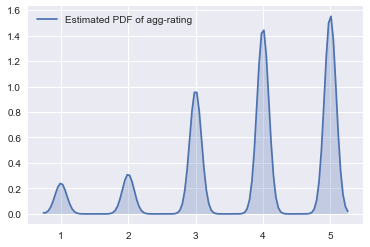

In [38]:
sns.kdeplot(df['agg_rating'], shade=True, label='Estimated PDF of agg-rating')

(array([  26828.,       0.,       0.,       0.,       0.,   34808.,
              0.,       0.,       0.,       0.,  108826.,       0.,
              0.,       0.,       0.,  163095.,       0.,       0.,
              0.,  173989.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,
         3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 20 Patch objects>)

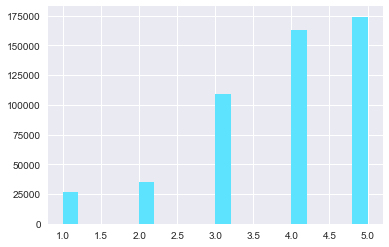

In [39]:
plt.hist(df['agg_rating'], bins=20, color="#5ee3ff")

Umm I'm not sure what I changed on the settings, but looks like I can't display graphs. Trying another notebook.

Let's leave it at describe everything, and describe by company if possible...

Edit: forgot the magic command '%matplotlib inline' from the lecture and: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [40]:
df.describe()

,agg_rating,comp_ben_rating,company_count_QnA,company_count_reviews,company_overall_rating,culture_rating,helpful_downvote_count,helpful_upvote_count,jobsec_advancement_rating,management_rating,work_life_rating,review_id,Compensation/Benefits,Culture,Job Security/Advancement,Work/Life Balance,Management
count,507546.000000,454413.000000,507546.000000,507546.000000,507546.000000,453603.000000,193733.000000,305277.000000,453783.000000,454018.000000,455576.000000,507546.000000,507546.000000,507546.000000,507546.000000,507546.000000,507546.000000
mean,3.832652,3.634227,75.068323,8011.901477,3.826641,3.644343,2.655521,4.983097,3.348649,3.410915,3.649073,380777.831030,3.633533,3.642706,3.343880,3.645047,3.412452
std,1.131046,1.252189,83.677144,15161.008515,0.234189,1.276757,4.016889,8.240986,1.334354,1.341730,1.251446,146519.862929,0.357350,0.256040,0.236003,0.242974,0.219563
min,1.000000,1.000000,1.000000,41.000000,2.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,127000.000000,2.500000,2.600000,2.400000,2.500000,2.300000
25%,3.000000,3.000000,21.000000,1899.000000,3.600000,3.000000,1.000000,1.000000,2.000000,3.000000,3.000000,253888.250000,3.300000,3.500000,3.200000,3.500000,3.300000
50%,4.000000,4.000000,49.000000,4053.500000,3.800000,4.000000,2.000000,2.000000,3.000000,4.000000,4.000000,380776.500000,3.700000,3.600000,3.300000,3.700000,3.400000
75%,5.000000,5.000000,95.000000,7908.000000,4.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,507667.750000,3.900000,3.800000,3.500000,3.800000,3.600000
max,5.000000,5.000000,597.000000,115013.000000,4.400000,5.000000,403.000000,434.000000,5.000000,5.000000,5.000000,634556.000000,4.400000,4.300000,4.100000,4.200000,3.900000


In [41]:
numeric_review_spec_cols = df[review_spec_cols].describe().columns
df[review_spec_cols].describe()

,agg_rating,comp_ben_rating,culture_rating,jobsec_advancement_rating,management_rating,work_life_rating,helpful_downvote_count,helpful_upvote_count,review_id
count,507546.000000,454413.000000,453603.000000,453783.000000,454018.000000,455576.000000,193733.000000,305277.000000,507546.000000
mean,3.832652,3.634227,3.644343,3.348649,3.410915,3.649073,2.655521,4.983097,380777.831030
std,1.131046,1.252189,1.276757,1.334354,1.341730,1.251446,4.016889,8.240986,146519.862929
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,127000.000000
25%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,253888.250000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,2.000000,2.000000,380776.500000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,507667.750000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,403.000000,434.000000,634556.000000


In [86]:
review_labels = review_spec_cols[[(x not in numeric_review_spec_cols) for x in review_spec_cols]]

TypeError: list indices must be integers or slices, not list

In [42]:
'''
You're looking for itertools.compress:

>>> from itertools import compress
>>> list_a = [1, 2, 4, 6]
>>> fil = [True, False, True, False]
>>> list(compress(list_a, fil))
[1, 4]
https://stackoverflow.com/questions/18665873/filtering-a-list-based-on-a-list-of-booleans
'''

from itertools import compress
review_labels = list(compress(review_spec_cols,[(x not in numeric_review_spec_cols) for x in review_spec_cols]))
review_labels

['review_date',
 'review_title',
 'reviewer_company_empl_status',
 'reviewer_job_location',
 'reviewer_job_title',
 'main_text',
 'con_text',
 'pro_text']

### Some to-dos:

Change review_date to date time that can be interpreted. 
Do some basic analysis on the main, con and pro text.